# 음성의 spectral bandwidth를 관찰하는 프로그램
좋은 feature인듯

In [8]:
import pandas as pd
from IPython.display import Audio, display
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf

In [9]:
sr = 32000

seed = 42
# seed = 123
# seed = 9903
train_file = "train.csv"
test_file = "test.csv"

In [10]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
train_df.head(3)

,id,path,label
0,RUNQPNJF,./train/RUNQPNJF.ogg,real
1,JFAWUOGJ,./train/JFAWUOGJ.ogg,fake
2,RDKEKEVX,./train/RDKEKEVX.ogg,real


mean  : 1507.8921178404548
median: 1388.7907225486274
std   : 443.61666336353215
min   : 685.7210731319382
max   : 2684.4364324492435


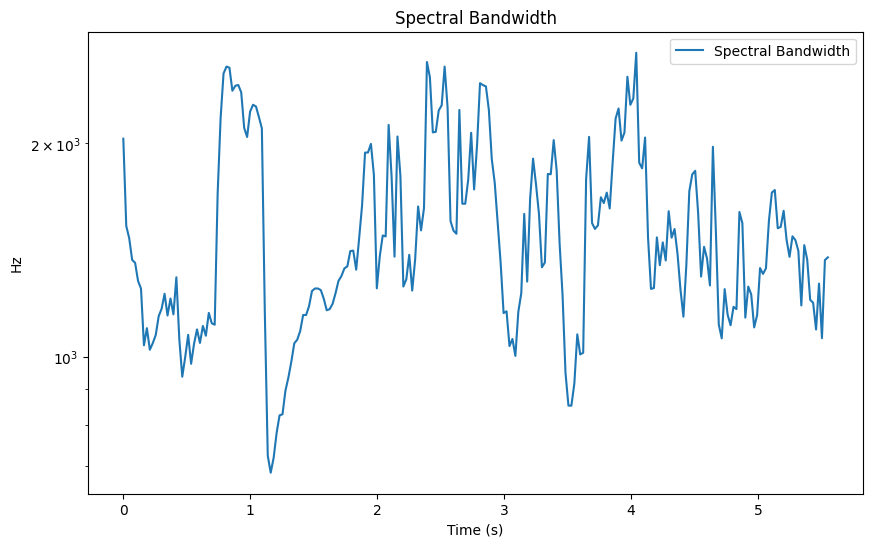

In [17]:
# 오디오 파일 로드
filename = './train/RUNQPNJF.ogg'  # 파일 경로를 여기에 입력하세요
y, sr = librosa.load(filename)

# n_fft와 hop_length 설정
frame_size_ms = 25  # 프레임 크기를 25ms로 설정
hop_size_ms = 10    # 홉 크기를 10ms로 설정

n_fft = int(sr * frame_size_ms / 1000)  # 프레임 크기 (샘플 수)
hop_length = int(sr * hop_size_ms / 1000)  # 홉 크기 (샘플 수)

# spectral bandwidth 계산
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

# 통계적 데이터 계산
spectral_bandwidth_mean = np.mean(spectral_bandwidth)
spectral_bandwidth_median = np.median(spectral_bandwidth)
spectral_bandwidth_std = np.std(spectral_bandwidth)
spectral_bandwidth_min = np.min(spectral_bandwidth)
spectral_bandwidth_max = np.max(spectral_bandwidth)

print(f"mean  : {spectral_bandwidth_mean}")
print(f"median: {spectral_bandwidth_median}")
print(f"std   : {spectral_bandwidth_std}")
print(f"min   : {spectral_bandwidth_min}")
print(f"max   : {spectral_bandwidth_max}")

# 시간 축 계산
frames = range(len(spectral_bandwidth[0]))
t = librosa.frames_to_time(frames, sr=sr)

# spectral bandwidth 시각화
plt.figure(figsize=(10, 6))
plt.semilogy(t, spectral_bandwidth[0], label='Spectral Bandwidth')
plt.xlabel('Time (s)')
plt.ylabel('Hz')
plt.title('Spectral Bandwidth')
plt.legend()
plt.show()

In [12]:
train_sample_real_df = train_df[train_df['label'] == "real"].sample(n=5, random_state=seed)
train_sample_fake_df = train_df[train_df['label'] == "fake"].sample(n=5, random_state=seed)
test_sample_df = test_df.sample(n=5, random_state=seed)

## train real  
방음 환경에서의 진짜 사람 목소리와 가짜 생성 목소리   
각 샘플 당 한명의 목소리

mean  : 1159.4512392748877
median: 1076.1989539468593
std   : 383.58613680597415
min   : 586.192391055244
max   : 2517.907600511246


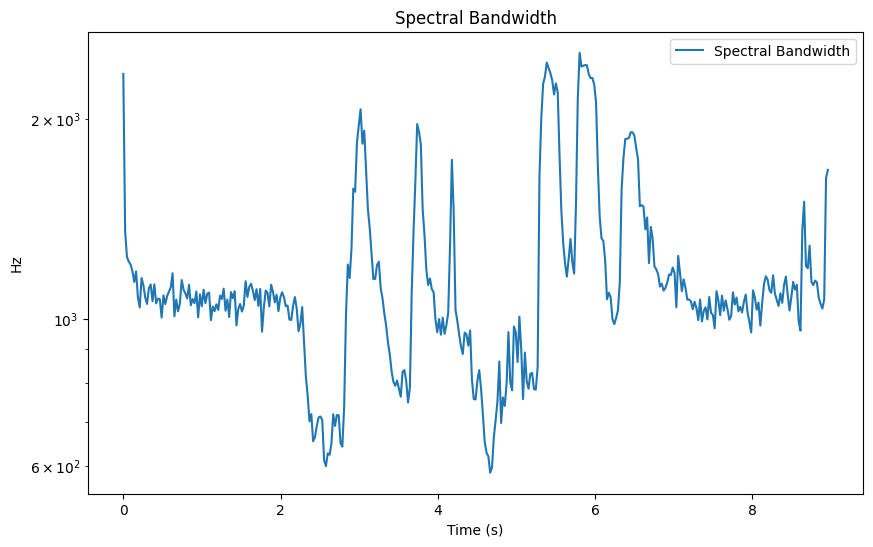

mean  : 1419.2017406954687
median: 1369.311150639928
std   : 525.25117970917
min   : 392.47917412402643
max   : 2889.0958772824943


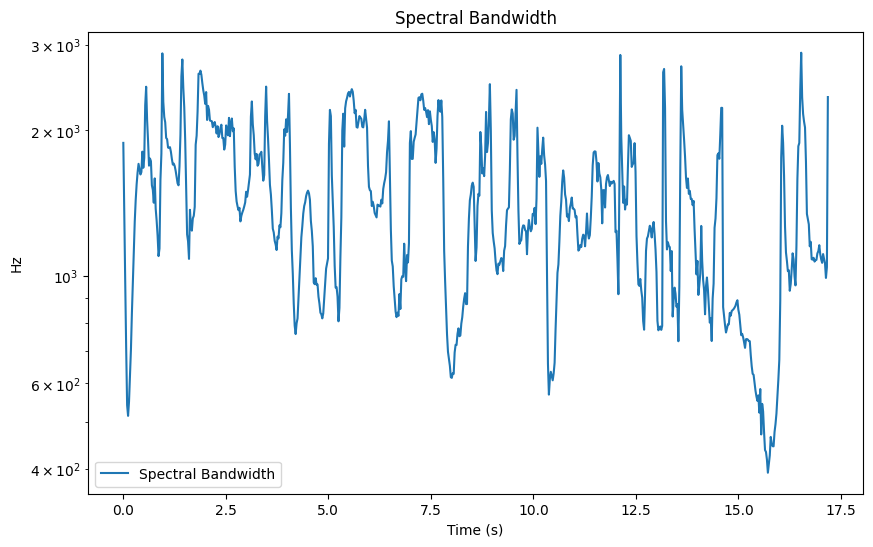

mean  : 1422.2140497018665
median: 1227.6496746659327
std   : 641.27737304284
min   : 527.0971052453484
max   : 3137.10999984805


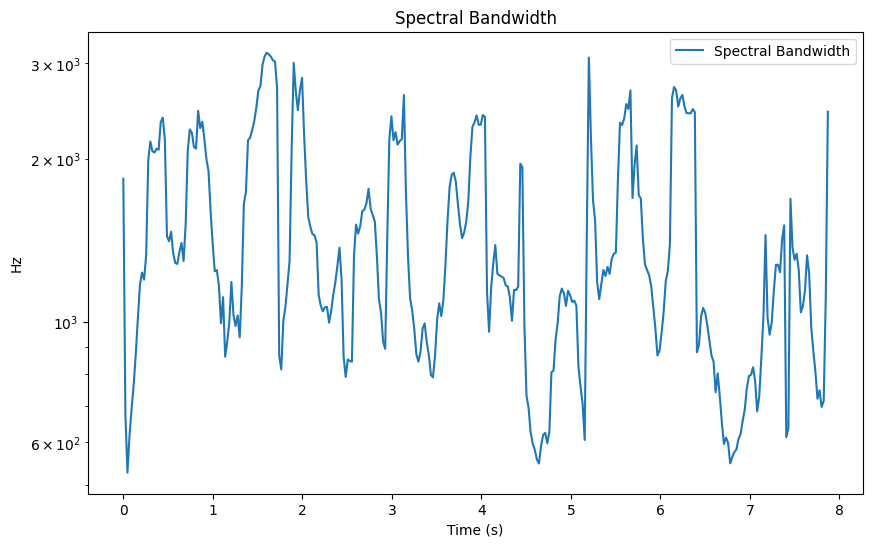

mean  : 1354.818463642531
median: 1227.4336338022224
std   : 514.1010950536996
min   : 453.73444041649566
max   : 2957.5497492551517


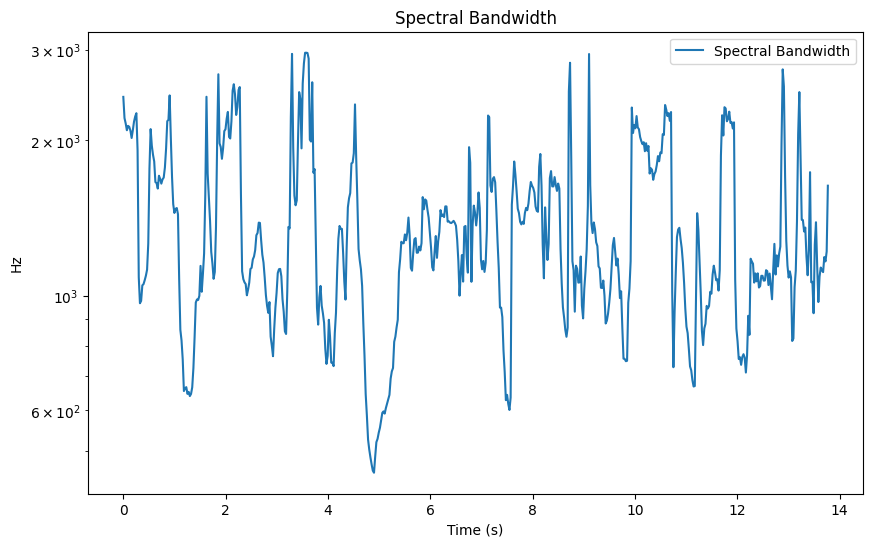

mean  : 1356.0455923381562
median: 1278.1048041225877
std   : 487.57522955153917
min   : 511.6945927386112
max   : 2973.679491613634


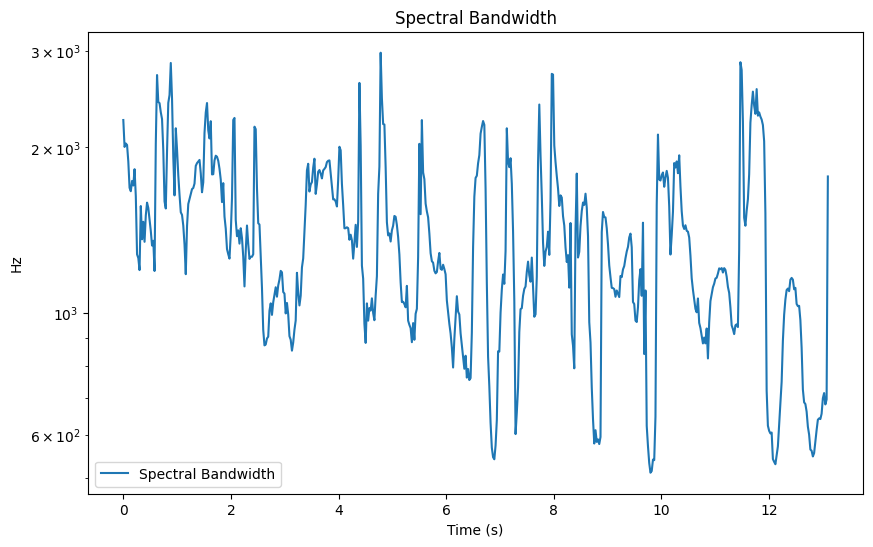

In [18]:
for index, row in train_sample_real_df.iterrows():
    # 오디오 파일 로드
    filename = row['path']
    y, sr = librosa.load(filename)

    # n_fft와 hop_length 설정
    frame_size_ms = 25  # 프레임 크기를 25ms로 설정
    hop_size_ms = 10    # 홉 크기를 10ms로 설정

    n_fft = int(sr * frame_size_ms / 1000)  # 프레임 크기 (샘플 수)
    hop_length = int(sr * hop_size_ms / 1000)  # 홉 크기 (샘플 수)

    # spectral bandwidth 계산
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # 통계적 데이터 계산
    spectral_bandwidth_mean = np.mean(spectral_bandwidth)
    spectral_bandwidth_median = np.median(spectral_bandwidth)
    spectral_bandwidth_std = np.std(spectral_bandwidth)
    spectral_bandwidth_min = np.min(spectral_bandwidth)
    spectral_bandwidth_max = np.max(spectral_bandwidth)

    print(f"mean  : {spectral_bandwidth_mean}")
    print(f"median: {spectral_bandwidth_median}")
    print(f"std   : {spectral_bandwidth_std}")
    print(f"min   : {spectral_bandwidth_min}")
    print(f"max   : {spectral_bandwidth_max}")

    # 시간 축 계산
    frames = range(len(spectral_bandwidth[0]))
    t = librosa.frames_to_time(frames, sr=sr)

    # spectral bandwidth 시각화
    plt.figure(figsize=(10, 6))
    plt.semilogy(t, spectral_bandwidth[0], label='Spectral Bandwidth')
    plt.xlabel('Time (s)')
    plt.ylabel('Hz')
    plt.title('Spectral Bandwidth')
    plt.legend()
    plt.show()

## train fake

mean  : 1379.743081612726
median: 1272.6458680250494
std   : 526.4333002207134
min   : 572.0701949343545
max   : 2477.378378070152


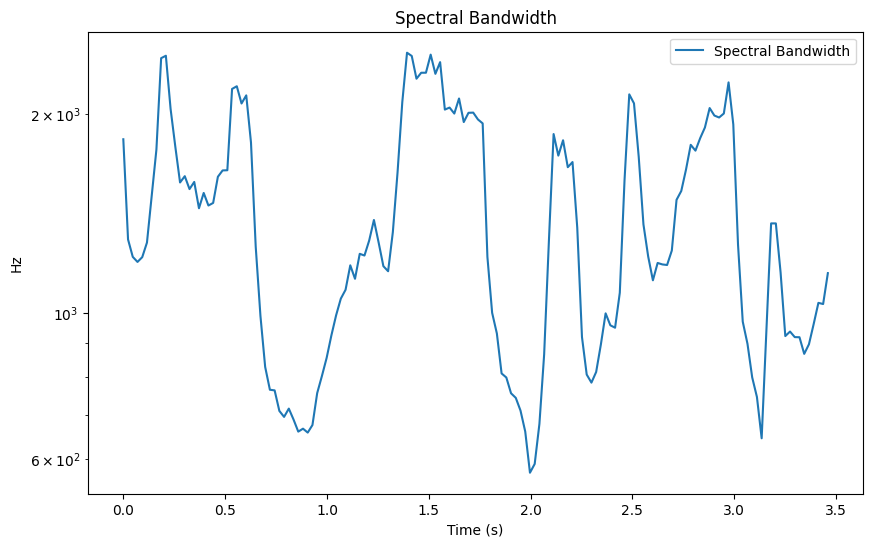

mean  : 1399.1849507010152
median: 1192.9221418158563
std   : 459.83093998594234
min   : 925.4001596577119
max   : 2450.565778599263


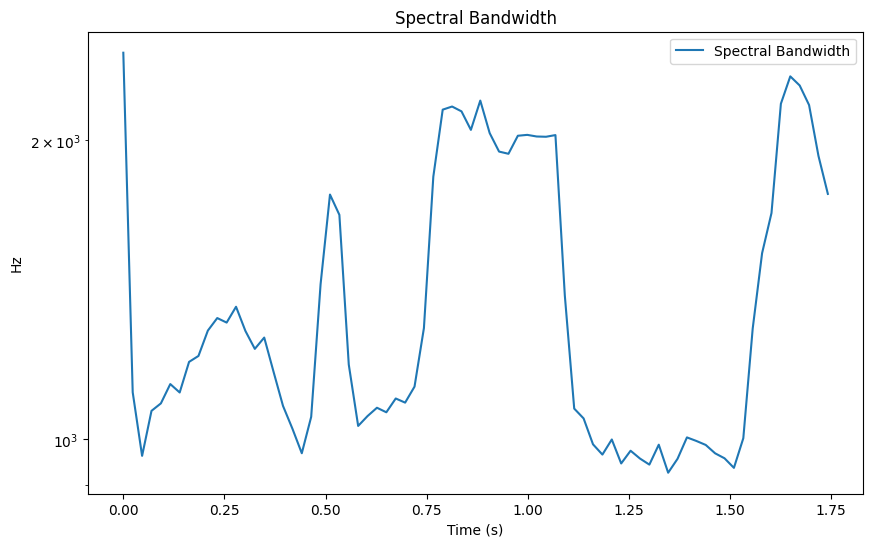

mean  : 1452.6456640708575
median: 1258.550369309813
std   : 561.924307486561
min   : 492.6738087526383
max   : 2700.0086244414183


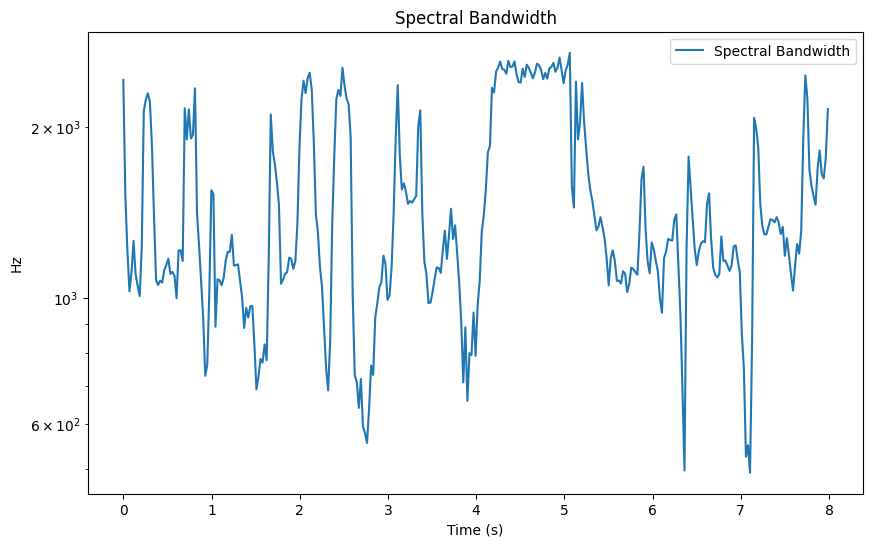

mean  : 901.1466048563439
median: 795.6254962152225
std   : 432.9947766761448
min   : 320.9721386653076
max   : 3120.559648076065


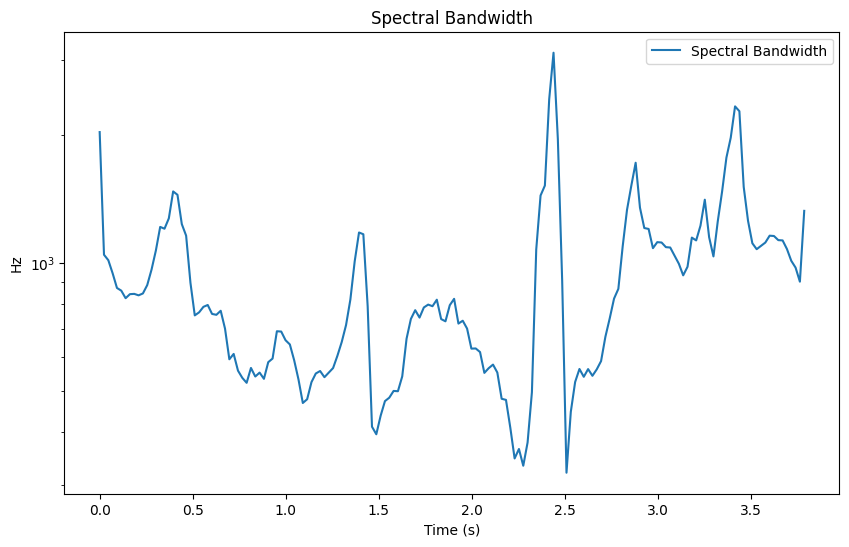

mean  : 1174.6065254580062
median: 969.0937311895102
std   : 489.0495740043971
min   : 533.6480344085712
max   : 2397.4004968034806


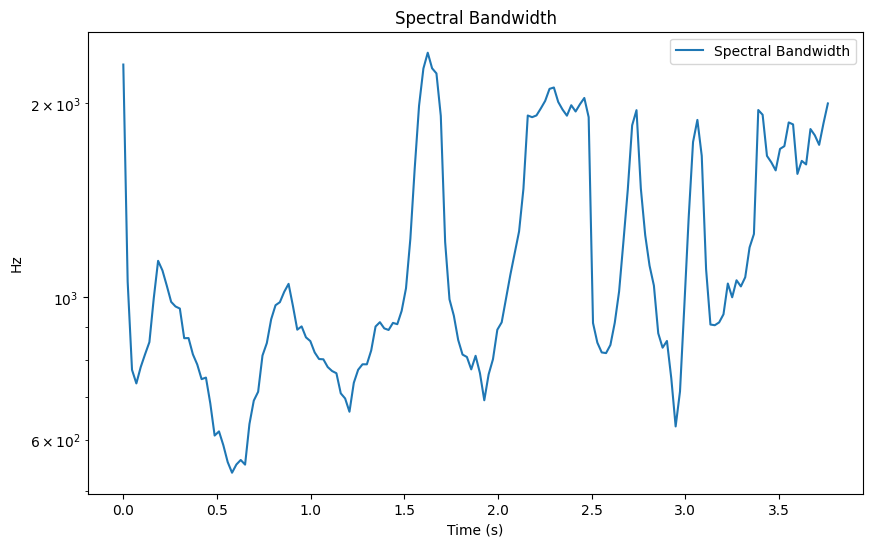

In [19]:
for index, row in train_sample_fake_df.iterrows():
    # 오디오 파일 로드
    filename = row['path']
    y, sr = librosa.load(filename)
    
    # n_fft와 hop_length 설정
    frame_size_ms = 25  # 프레임 크기를 25ms로 설정
    hop_size_ms = 10    # 홉 크기를 10ms로 설정

    n_fft = int(sr * frame_size_ms / 1000)  # 프레임 크기 (샘플 수)
    hop_length = int(sr * hop_size_ms / 1000)  # 홉 크기 (샘플 수)

    # spectral bandwidth 계산
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # 통계적 데이터 계산
    spectral_bandwidth_mean = np.mean(spectral_bandwidth)
    spectral_bandwidth_median = np.median(spectral_bandwidth)
    spectral_bandwidth_std = np.std(spectral_bandwidth)
    spectral_bandwidth_min = np.min(spectral_bandwidth)
    spectral_bandwidth_max = np.max(spectral_bandwidth)

    print(f"mean  : {spectral_bandwidth_mean}")
    print(f"median: {spectral_bandwidth_median}")
    print(f"std   : {spectral_bandwidth_std}")
    print(f"min   : {spectral_bandwidth_min}")
    print(f"max   : {spectral_bandwidth_max}")

    # 시간 축 계산
    frames = range(len(spectral_bandwidth[0]))
    t = librosa.frames_to_time(frames, sr=sr)

    # spectral bandwidth 시각화
    plt.figure(figsize=(10, 6))
    plt.semilogy(t, spectral_bandwidth[0], label='Spectral Bandwidth')
    plt.xlabel('Time (s)')
    plt.ylabel('Hz')
    plt.title('Spectral Bandwidth')
    plt.legend()
    plt.show()

## test
5초 분량   
방음 환경/그렇지 않은 환경(배경음악이 있다)   
최대 2개의 목소리(둘 다 real이거나 fake)

In [44]:
# for index, row in test_sample_df.iterrows():
#     audio_file = row['path']
#     print(f"Playing audio file: {audio_file}")
#     display(Audio(audio_file))

()